In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import datasets
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import math
import matplotlib.pyplot as plt

In [2]:
def convert_labels(x):
    y = []
    for i in range(len(x)):
        y.append([(199.9-0.9*x[i][0])/199])
    return np.array(y)

def binary_labels(x):
    y=[]
    for i in range(0, len(x)):
        if(x[i]>50):
            y.append(0)
        else:
            y.append(1)
    return np.array(y)

In [3]:
dataX = pd.read_csv('./datasets/spotofy_music_normalized.csv')
dataX.head()
m = len(dataX) # Number of  examples
X = np.array(dataX)

dataY = pd.read_csv('./datasets/spotofy_music_labels.csv')
dataY.head()
Y = np.array(dataY)
Y = binary_labels(Y)

print(np.sum(Y==0))
print(np.sum(Y==1))
Y.shape
# Y = convert_labels(Y)
print(Y)

2819
1428
[1 1 1 ... 0 0 0]


In [4]:
kf = KFold(n_splits=5)
res = []
max_depths = [1,2,4,6,8,10,12,16,20, 30]
ans_entropy = {}
ans_gini = {}

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    for i in range(0, len(max_depths)):
        model = DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depths[i])
        model2 = DecisionTreeClassifier(criterion = 'gini', max_depth = max_depths[i])
        
        model = model.fit(X_train, y_train)
        model2 = model2.fit(X_train, y_train)

        pred1 = model.predict(X_test)
        pred2 = model.predict(X_test)
        
        acc1 = accuracy_score(pred1, y_test)
        acc2 = accuracy_score(pred2, y_test)
        
        if max_depths[i] in ans_entropy.keys():
            if ans_entropy[max_depths[i]] > acc1:
                continue
            else:
                ans_entropy[ max_depths[i]] = acc1
        else:
            ans_entropy[ max_depths[i]] = acc1
        
        if max_depths[i] in ans_gini.keys():
            if ans_gini[ max_depths[i]] > acc2:
                continue
            else:
                ans_gini[ max_depths[i]] = acc2
        else:
            ans_gini[ max_depths[i]] = acc2

print(ans_entropy, ans_gini)

{1: 0.6925795053003534, 2: 0.7208480565371025, 4: 0.7290930506478209, 6: 0.6984687868080094, 8: 0.6749116607773852, 10: 0.6631330977620731, 12: 0.6552941176470588, 16: 0.6419316843345112, 20: 0.6336866902237926, 30: 0.6230859835100118} {1: 0.6925795053003534, 2: 0.7208480565371025, 4: 0.7290930506478209, 6: 0.6984687868080094, 8: 0.6749116607773852, 10: 0.6631330977620731, 12: 0.6552941176470588, 16: 0.6419316843345112, 20: 0.6336866902237926, 30: 0.6230859835100118}


[0.6925795053003534, 0.7208480565371025, 0.7290930506478209, 0.6984687868080094, 0.6749116607773852, 0.6631330977620731, 0.6552941176470588, 0.6419316843345112, 0.6336866902237926, 0.6230859835100118] [0.6925795053003534, 0.7208480565371025, 0.7290930506478209, 0.6984687868080094, 0.6749116607773852, 0.6631330977620731, 0.6552941176470588, 0.6419316843345112, 0.6336866902237926, 0.6230859835100118]


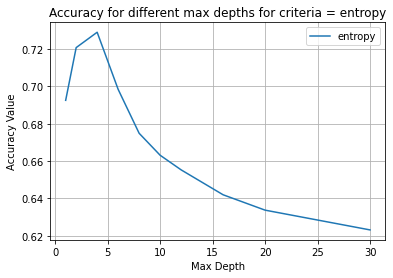

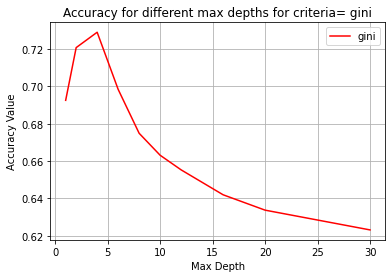

In [5]:
list_gini = []
list_entropy = []

for key in ans_entropy.keys():
    list_entropy.append(ans_entropy[key])
for key in ans_gini.keys():
    list_gini.append(ans_gini[key])
    
print(list_entropy, list_gini)
plt.grid()
plt.plot(max_depths, list_entropy, label = "entropy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Value")
plt.title("Accuracy for different max depths for criteria = entropy")
plt.legend()
plt.savefig("./plots/decision_tree_binary_entropy.png")
plt.show()

plt.grid()
plt.plot(max_depths, list_gini,'r' , label = "gini")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Value")
plt.title("Accuracy for different max depths for criteria= gini")
plt.legend()
plt.savefig("./plots/decision_tree_binary_gini.png")
plt.show()



Convert Labels

In [6]:
dataY = pd.read_csv('./datasets/spotofy_music_labels.csv')
dataY.head()
Y = np.array(dataY)

Y = convert_labels(Y)
print(Y)

[[1.        ]
 [0.99547739]
 [0.99095477]
 ...
 [0.33517588]
 [0.1361809 ]
 [0.12261307]]


In [9]:
kf = KFold(n_splits=5)
res = []
max_depths = [1,2,4,6,8,10,12,16,20, 30]
ans_entropy = {}
ans_gini = {}

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    for i in range(0, len(max_depths)):
        model = DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depths[i])
        model2 = DecisionTreeClassifier(criterion = 'gini', max_depth = max_depths[i])
        
        model = model.fit(X_train, y_train)
        model2 = model2.fit(X_train, y_train)

        pred1 = model.predict(X_test)
        pred2 = model.predict(X_test)
        
        acc1 = accuracy_score(pred1, y_test)
        acc2 = accuracy_score(pred2, y_test)
        
        if max_depths[i] in ans_entropy.keys():
            if ans_entropy[max_depths[i]] > acc1:
                continue
            else:
                ans_entropy[ max_depths[i]] = acc1
        else:
            ans_entropy[ max_depths[i]] = acc1
        
        if max_depths[i] in ans_gini.keys():
            if ans_gini[ max_depths[i]] > acc2:
                continue
            else:
                ans_gini[ max_depths[i]] = acc2
        else:
            ans_gini[ max_depths[i]] = acc2

print(ans_entropy, ans_gini)

ValueError: Unknown label type: 'continuous'

In [ ]:
list_gini = []
list_entropy = []

for key in ans_entropy.keys():
    list_entropy.append(ans_entropy[key])
for key in ans_gini.keys():
    list_gini.append(ans_gini[key])
    
print(list_entropy, list_gini)
plt.grid()
plt.plot(max_depths, list_entropy, label = "entropy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Value")
plt.title("Accuracy for different max depths for criteria = entropy")
plt.legend()
plt.savefig("./plots/decision_tree_rank_entropy.png")
plt.show()

plt.grid()
plt.plot(max_depths, list_gini,'r' , label = "gini")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Value")
plt.title("Accuracy for different max depths for criteria= gini")
plt.legend()
plt.savefig("./plots/decision_tree_rank_gini.png")
plt.show()

